In [1]:
import numpy as np
import pandas as pd 
import random as rd
import matplotlib.pyplot as plt
import plotly.express as px
from statistics import mean 

In [2]:
#Loading and parsing data funciton
def load_data(fname):
    X=[]
    Y=[]
    f = open(fname,"r")
    for i,line in enumerate(f.readlines()):
        row = line.strip()
        nrow = row.replace('\t',' ')
        row_data = nrow.split(' ')
        X.append([])
        for j in row_data[0:4]:
            X[i].append(float(j))
        Y.append(int(row_data[-1]))
    X = np.array(X)
    X0 = np.ones(len(X))
    X0 = np.array(X0).reshape(len(X),1)
    X = np.concatenate((X0,X),axis=1)
    Y = np.array(Y)
    return X,Y

In [3]:
def sign(xt,wt):
    if np.dot(xt,wt)>0:
        return 1
    else:
        return -1

In [4]:
def PLA(X,Y,W):
    updates = 0
    CorrectNum = 0 #Accumulate number of correct classification through training 
    index = 0 #Current (X,Y) sample
    flag = False # Mark when to stop updating
    while(not flag):
        if sign(X[index],W) == Y[index]:  
            CorrectNum += 1
        else:
            W=W+Y[index]*X[index]
            updates+=1
            CorrectNum = 0  
            
       #If we visited whole sample but don't find the "perfect line" 
       #continue update through the dataset until answer go all correct
        if(index == len(X)-1): 
            index = 0
        else:
            index += 1
        
        if CorrectNum == len(X):
            flag = True
    
    return W,updates

In [5]:
def shuffle():
    id = [x for x in range(len(X))]
    ShuffleX = []
    ShuffleY = []
    rd.shuffle(id)
    for i in id:
        ShuffleX.append(X[i])
        ShuffleY.append(Y[i])
    return ShuffleX,ShuffleY

In [6]:
X,Y = load_data("hw1_6_train.dat")
W = np.zeros(5)
np.array(W).reshape(5,1)

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [7]:
#It's hard to visualize raw data but you can try code below (Have fun with interaction)
'''
df = pd.DataFrame(X)
column_indices = [1,2,3,4]
new_names = ['x1','x2','x3','x4']
old_names = df.columns[column_indices]
df.rename(columns=dict(zip(old_names, new_names)), inplace=True)
df['y'] =  Y
fig = px.scatter_3d(df, x='x1', y='x2', z='x3',
              color='x4', symbol='y')
fig.show()
'''


"\ndf = pd.DataFrame(X)\ncolumn_indices = [1,2,3,4]\nnew_names = ['x1','x2','x3','x4']\nold_names = df.columns[column_indices]\ndf.rename(columns=dict(zip(old_names, new_names)), inplace=True)\ndf['y'] =  Y\nfig = px.scatter_3d(df, x='x1', y='x2', z='x3',\n              color='x4', symbol='y')\nfig.show()\n"

In [8]:
save_update = []
save_W = [] 
for i in range(1126):
    random = rd.randint(0,9999)
    rd.seed(random)
    x,y = shuffle()
    train_w,train_u = PLA(x,y,W)
    save_update.append(train_u)
    save_W.append(train_w)

The average number of updates is  39.22113676731794


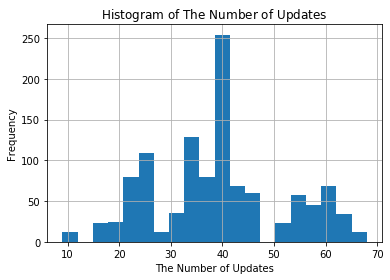

In [9]:
#Print average number of updates
avg_updates  = mean(save_update)
print("The average number of updates is ",avg_updates)

#Plot histogram to show number of updates
plt.figure()
plt.hist(save_update,bins=20)
plt.ylabel('Frequency')
plt.xlabel('The Number of Updates')
plt.title(r'$\mathrm{Histogram\ of\ The\ Number\ of\ Updates}$')
plt.grid(True)
plt.show()